# ETF Universe Data Processing
## ETF Universe

| Ticker | Sector |
| ------ | -----  |
| XLB | Materials |
| XLE | Energy |
| XLF | Financials |
| XLI | Industrials |
| XLK | IT |
| XLP | Consumer Staples |
| XLU | Utility |
| XLV | Healthcare |
| XLY | Consumer Discretionary |

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
# Set ETF universe tickers
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# Declare ticker object
yfObj = yf.Tickers(tickers)

# Download historical data
df = yfObj.history(start='2011-01-01', end='2024-08-31')

# Drop all columns except the Close price
df.drop(['Capital Gains','Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], inplace=True, axis=1)

# Fill NaN values with the previous value
df.ffill(inplace=True)

# Remove the first column level
df = df.droplevel(0, axis=1)

# Resample data to weekly frequency
df = df.resample('W').last()


[*********************100%***********************]  9 of 9 completed


In [7]:
df

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-09 00:00:00+00:00,28.986368,43.135246,10.246600,27.200687,21.277691,20.191212,19.790297,25.543015,31.839252
2011-01-16 00:00:00+00:00,29.357105,44.632473,10.562467,27.702118,21.624744,20.399870,19.890562,25.630621,32.025043
2011-01-23 00:00:00+00:00,28.358362,44.285000,10.398219,27.694408,21.252909,20.511156,20.022167,25.638584,31.940586
2011-01-30 00:00:00+00:00,28.608040,44.923077,10.265556,27.640398,21.343790,20.156435,19.834158,25.176636,31.332527
2011-02-06 00:00:00+00:00,29.947283,46.830914,10.492976,28.373255,22.054430,20.379000,19.928164,25.750101,32.269974
...,...,...,...,...,...,...,...,...,...
2024-08-04 00:00:00+00:00,90.040001,88.400002,42.060001,122.730003,204.720001,79.260002,74.220001,150.860001,176.160004
2024-08-11 00:00:00+00:00,88.559998,89.410004,42.400002,124.279999,205.630005,79.150002,73.610001,149.979996,174.339996
2024-08-18 00:00:00+00:00,90.570000,90.470001,43.770000,126.970001,221.399994,80.510002,74.440002,152.869995,183.130005


<Axes: xlabel='Date'>

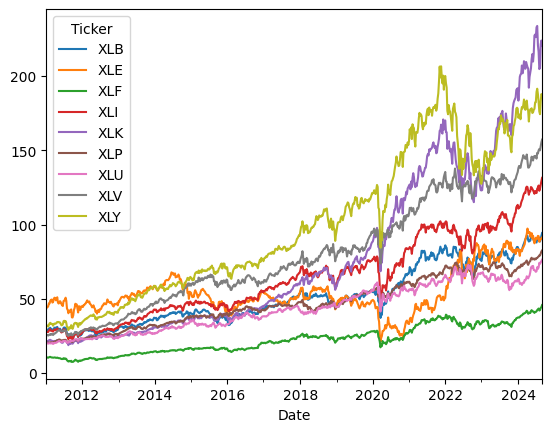

In [8]:
df.plot()

### 1. Return

<Axes: xlabel='Date'>

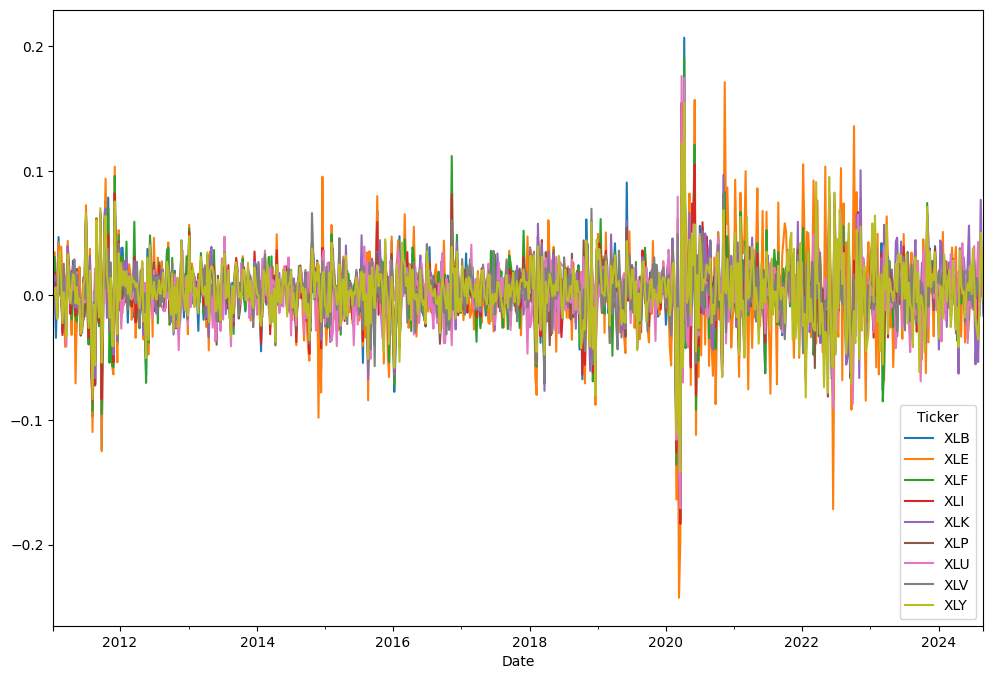

In [9]:
rets = df.pct_change().fillna(0)
rets.plot(figsize=(12,8))

### 2. Annual Volatility

<Axes: xlabel='Date'>

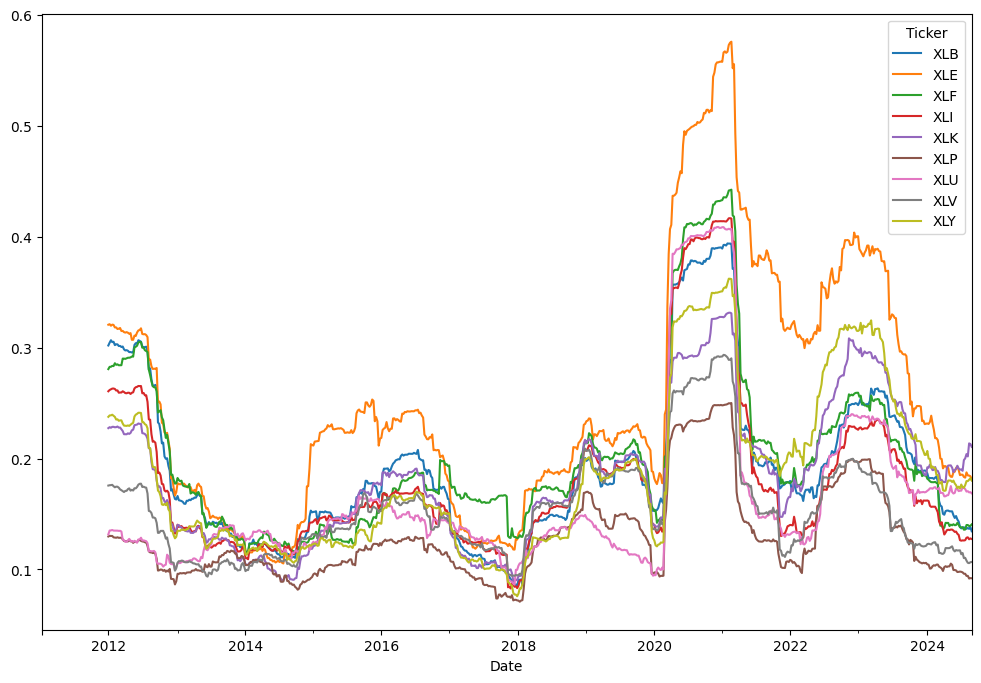

In [10]:
vols = rets.rolling(52).std() * np.sqrt(52)
vols.plot(figsize=(12, 8))

### 3. Correlation

In [11]:
corr = rets.corr()
corr

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,
XLB,1.000000,0.704004,0.829315,0.883096,0.700374,0.604490,0.493174,0.672344,0.760332
XLE,0.704004,1.000000,0.693926,0.709488,0.455079,0.448376,0.363383,0.480267,0.511853
XLF,0.829315,0.693926,1.000000,0.885880,0.675229,0.618348,0.485653,0.672010,0.760950
XLI,0.883096,0.709488,0.885880,1.000000,0.756957,0.688261,0.554659,0.712689,0.815932
XLK,0.700374,0.455079,0.675229,0.756957,1.000000,0.624418,0.431137,0.678466,0.852353
XLP,0.604490,0.448376,0.618348,0.688261,0.624418,1.000000,0.675461,0.718223,0.656341
XLU,0.493174,0.363383,0.485653,0.554659,0.431137,0.675461,1.000000,0.567992,0.497498
XLV,0.672344,0.480267,0.672010,0.712689,0.678466,0.718223,0.567992,1.000000,0.689117
XLY,0.760332,0.511853,0.760950,0.815932,0.852353,0.656341,0.497498,0.689117,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

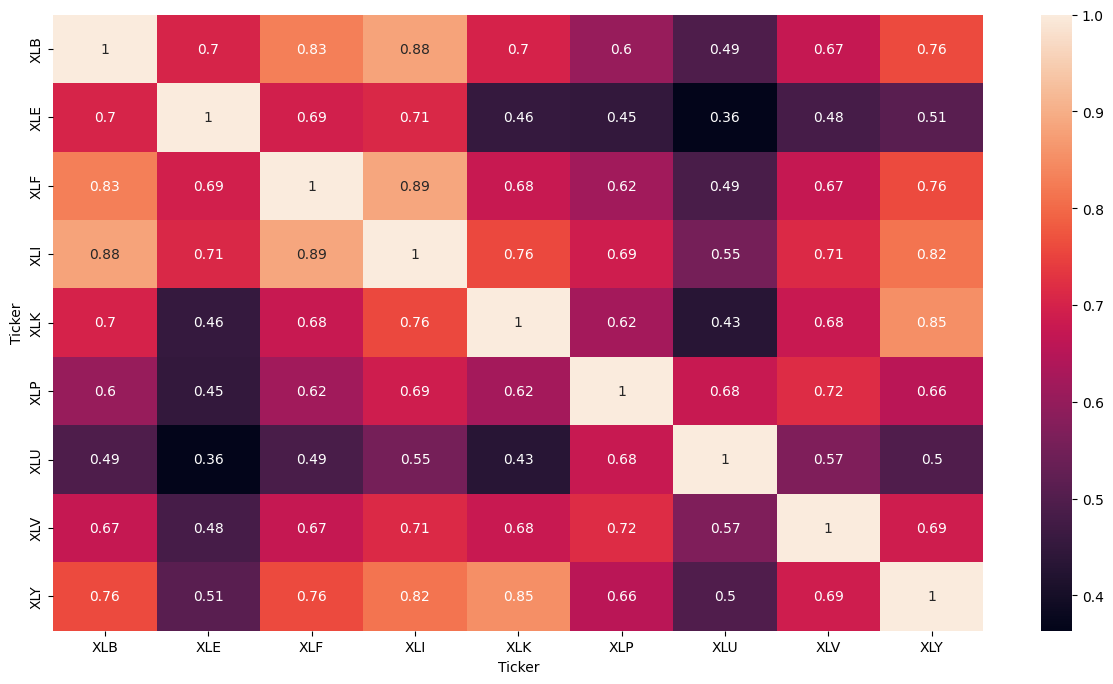

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

### 4. Covariance Matrix

- Cov()

In [21]:
cov = rets.cov() *52 #since it is a week data
cov

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,
XLB,0.041356,0.038993,0.035724,0.034593,0.027655,0.016325,0.017688,0.021518,0.030424
XLE,0.038993,0.074177,0.040032,0.037222,0.024065,0.016217,0.017454,0.020585,0.027430
XLF,0.035724,0.040032,0.044867,0.036145,0.027770,0.017394,0.018142,0.022401,0.031715
XLI,0.034593,0.037222,0.036145,0.037105,0.028311,0.017606,0.018842,0.021605,0.030925
XLK,0.027655,0.024065,0.027770,0.028311,0.037699,0.016100,0.014763,0.020731,0.032563
XLP,0.016325,0.016217,0.017394,0.017606,0.016100,0.017636,0.015819,0.015010,0.017150
XLU,0.017688,0.017454,0.018142,0.018842,0.014763,0.015819,0.031103,0.015764,0.017264
XLV,0.021518,0.020585,0.022401,0.021605,0.020731,0.015010,0.015764,0.024767,0.021339
XLY,0.030424,0.027430,0.031715,0.030925,0.032563,0.017150,0.017264,0.021339,0.038715


- rets.var() 

In [22]:
vols_1 = rets.var()*52
vols_1

Ticker
XLB    0.041356
XLE    0.074177
XLF    0.044867
XLI    0.037105
XLK    0.037699
XLP    0.017636
XLU    0.031103
XLV    0.024767
XLY    0.038715
dtype: float64

- diag(cov)

In [23]:
vols_2 = np.diag(cov)
vols_2

array([0.04135641, 0.07417697, 0.0448671 , 0.03710473, 0.03769944,
       0.01763554, 0.03110254, 0.02476652, 0.03871522])